In [3]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers


In [4]:
n = 1000
classes = 3
dimensions = 2

train_size = int(n * 0.8)

X, y = make_blobs(
    n_samples = n,
    centers = classes,
    n_features = dimensions,
    cluster_std = 2
)

X_train, X_test = X[:train_size, :], X[train_size:,:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
print(X_train.shape)
print(X_train)

(800, 2)
[[ 4.1240881  -4.90742814]
 [-0.08493097 -0.32894705]
 [10.14970556  7.79782988]
 ...
 [ 7.51346127  5.48469465]
 [ 9.8178251   7.71886479]
 [ 8.57802165  5.83891907]]


In [6]:
print(X_test.shape)
print(X_test)

(200, 2)
[[ 6.23277663  4.84402282]
 [ 3.04956257 -5.61671422]
 [ 7.66572539  3.70797386]
 [-1.08548406 -3.73786446]
 [ 4.89948718 -5.88413112]
 [-2.85743683 -5.89290835]
 [ 4.88964584 -1.87009115]
 [ 4.40460844 -6.81884159]
 [ 7.9260939   6.28328353]
 [ 6.26757247 -4.23992602]
 [ 4.73857444 -1.96485187]
 [ 9.60373172  5.26010171]
 [ 9.79444938  6.09670148]
 [12.62169023  8.36708492]
 [ 7.86884779  7.35682533]
 [12.91991865  8.55380041]
 [ 0.8938559  -3.77367618]
 [ 5.22628008 -5.73115282]
 [10.13820674  6.06286839]
 [ 6.30049346 -2.68178704]
 [ 8.9590912   4.14026744]
 [-0.08589717 -4.15322113]
 [ 1.2846085  -4.04978648]
 [ 8.61264948  4.29044895]
 [ 2.75355672 -7.3961604 ]
 [ 4.8103573  -7.70594658]
 [-0.52114941 -5.26083096]
 [ 9.36027295  4.8652064 ]
 [ 2.24527384 -5.52429482]
 [ 4.2575416  -5.49735481]
 [10.72814895  7.18639648]
 [ 0.67306103 -7.24902747]
 [ 4.0923241  -6.1222748 ]
 [10.42265732  7.87234012]
 [ 8.57249949 10.87283957]
 [-0.93370225 -2.16307091]
 [10.75476704  9.40

In [7]:
print(y_train.shape)
print(y_train)

(800,)
[0 1 2 1 2 1 2 2 0 1 0 0 2 2 2 1 2 2 1 1 2 1 2 0 0 0 2 2 1 1 1 0 2 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 1 2 0 2 1 2 1 1 2 1 1 2 1 0 2 2 0 0 2 1 1 2 1 1 0 0 2
 0 2 2 1 2 0 1 1 0 2 1 0 0 0 1 2 1 1 2 0 0 0 0 0 1 2 1 0 1 1 0 1 0 1 1 2 1
 1 0 1 2 0 1 0 0 0 1 2 2 0 1 2 0 0 2 0 0 1 1 0 1 0 0 0 1 1 0 2 0 1 1 2 1 1
 0 0 0 1 0 2 0 1 0 0 1 1 0 0 0 2 0 0 2 0 0 2 2 1 1 2 2 0 0 1 1 1 1 2 1 2 0
 2 0 2 0 0 1 2 2 1 0 1 1 2 2 1 2 1 0 1 0 0 2 0 1 2 1 0 0 0 2 1 1 0 2 2 2 0
 1 2 1 2 2 1 2 0 2 2 0 2 1 1 0 1 1 2 2 0 1 1 1 0 0 2 0 1 1 2 1 1 1 1 1 2 0
 0 0 1 1 0 2 2 0 0 0 0 1 0 1 0 1 2 1 1 2 0 1 2 2 1 1 0 1 0 2 1 1 1 0 1 2 0
 1 2 2 1 0 2 2 0 2 1 0 1 2 2 2 1 2 1 2 0 0 1 0 0 2 2 0 1 1 0 2 0 0 0 1 0 2
 1 2 1 0 2 1 1 1 1 1 2 0 1 2 2 0 0 1 0 0 0 2 1 2 1 1 0 2 0 1 2 0 1 1 0 2 1
 1 1 2 0 2 1 2 1 1 0 1 2 1 0 2 1 0 1 0 2 2 2 0 2 1 1 1 0 0 0 0 2 1 0 2 0 2
 2 2 2 2 2 0 1 1 0 1 0 0 2 1 2 0 2 2 2 2 1 2 2 0 2 0 2 1 0 2 0 2 2 2 0 2 0
 0 1 2 0 2 2 1 1 0 2 2 0 0 2 2 0 2 1 2 2 0 0 1 1 1 0 2 1 1 0 2 2 1 1 0 1 1
 1 1 2 0 1 1 2 0 1

In [8]:
print(y_test.shape)

(200,)


In [9]:
def fit_model(batch_size) :
  model = models.Sequential([
      layers.Dense(32, input_dim = dimensions, activation = 'relu'),
      layers.Dense(classes, activation = 'softmax')
  ])

  model.compile(
      optimizer = keras.optimizers.SGD(learning_rate = 0.01,
                                       momentum = 0.9),
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
  )

  history = model.fit(
      X_train,
      y_train,
      validation_data = (X_test, y_test),
      epochs = 100,
      batch_size = batch_size
  )

  return model, history

def evaluate(model, history) :
  _, train_accuracy = model.evaluate(X_train, y_train)
  _, test_accuracy = model.evaluate(X_test, y_test)

  print(f"Training accuracy : {train_accuracy : .2f}")
  print(f"Testing accuracy : {test_accuracy : .2f}")

  plt.figure(figsize = (6,4), dpi = 160)

  plt.plot(history.history['loss'], label = 'train')
  plt.plot(history.history['val_loss'], label = 'test')

  plt.legend()
  plt.show()

Epoch 1/100
800/800 [==============================] - 7s 4ms/step - loss: 0.5244 - accuracy: 0.8112 - val_loss: 0.3106 - val_accuracy: 0.9050
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3514 - accuracy: 0.8425 - val_loss: 0.2582 - val_accuracy: 0.9050
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3506 - accuracy: 0.8512 - val_loss: 0.2359 - val_accuracy: 0.9050
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3886 - accuracy: 0.8163 - val_loss: 0.2713 - val_accuracy: 0.9000
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3496 - accuracy: 0.8462 - val_loss: 0.3015 - val_accuracy: 0.8600
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3380 - accuracy: 0.8650 - val_loss: 0.2327 - val_accuracy: 0.9100
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3415 - accuracy: 0.8675 - val_loss: 0.1724 - val_accuracy: 0.9050

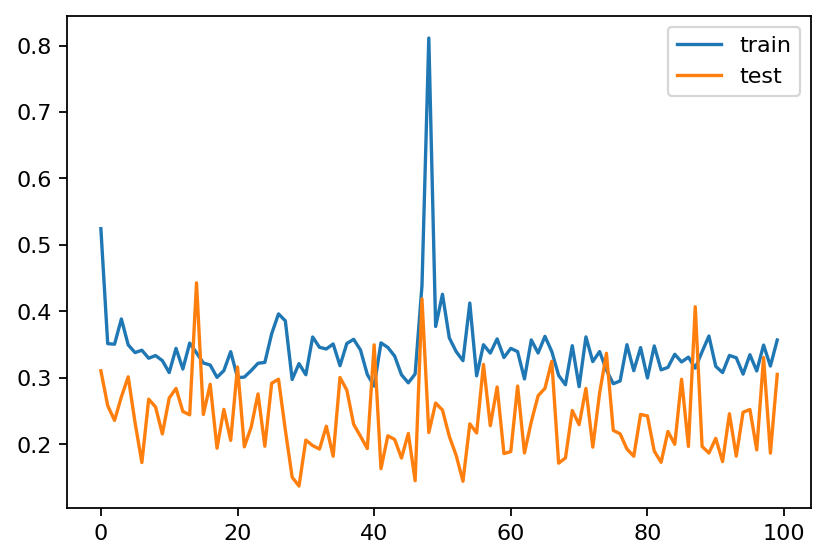

In [10]:
model, history = fit_model(batch_size = 1)
evaluate(model, history)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.3682 - accuracy: 0.4263 - val_loss: 1.2527 - val_accuracy: 0.4300
Epoch 2/100
1/1 [==============================] - 0s 127ms/step - loss: 1.2499 - accuracy: 0.4313 - val_loss: 1.0797 - val_accuracy: 0.4200
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 1.0881 - accuracy: 0.4325 - val_loss: 0.9024 - val_accuracy: 0.4400
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 0.9227 - accuracy: 0.4350 - val_loss: 0.7370 - val_accuracy: 0.5800
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.7676 - accuracy: 0.5587 - val_loss: 0.5973 - val_accuracy: 0.6500
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6355 - accuracy: 0.6300 - val_loss: 0.4895 - val_accuracy: 0.7100
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 0.5319 - accuracy: 0.6712 - val_loss: 0.4096 - val_accuracy: 0.7250
Epoch 8/100
1/1 [====

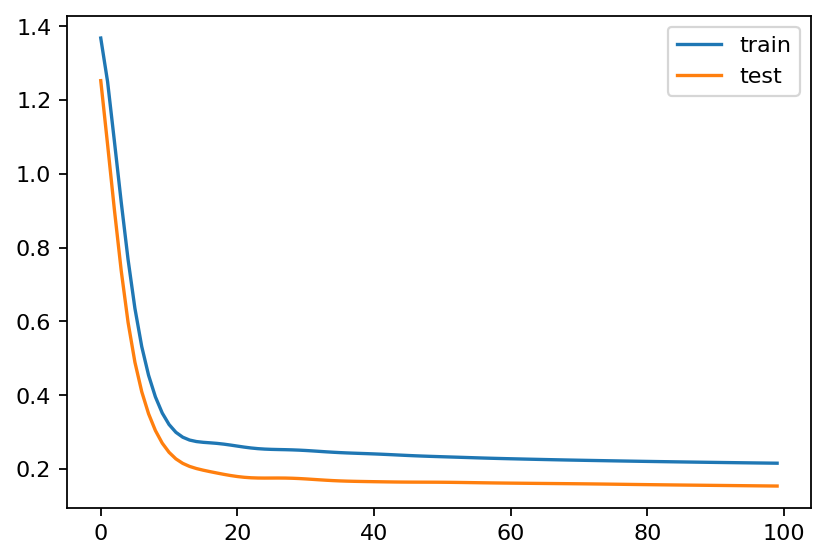

In [11]:
model, history = fit_model(batch_size=train_size)
evaluate(model, history)

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 0.4651 - accuracy: 0.7675 - val_loss: 0.1706 - val_accuracy: 0.9200
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.2539 - accuracy: 0.8850 - val_loss: 0.1770 - val_accuracy: 0.9150
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.2388 - accuracy: 0.8888 - val_loss: 0.1597 - val_accuracy: 0.9300
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.2215 - accuracy: 0.8963 - val_loss: 0.1535 - val_accuracy: 0.9150
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.2179 - accuracy: 0.9050 - val_loss: 0.1511 - val_accuracy: 0.9150
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2103 - accuracy: 0.9000 - val_loss: 0.1448 - val_accuracy: 0.9100
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.9137 - val_loss: 0.1425 - val_accuracy: 0.9100
Epoch 8/100

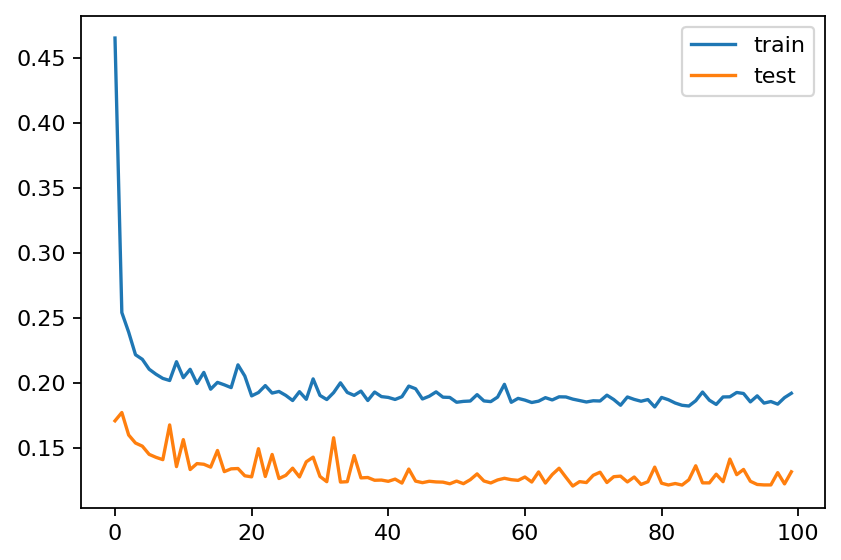

In [12]:
model, history = fit_model(batch_size=32)
evaluate(model, history)